# Putting Bryce Harper's Season in Historical Context

### Outline
1. Intro - Harper is struggling, general overview of this year
2. Look at how he ranks this year relative to the league - Analyze, look at how hes fallen off compared to rankings last year
3. Look at how this year compares to his career - Analyze, look at different aspects of his game. What specifically could be causing these problems?
4. Switch scope to MVP follow up season, look at past MVPs - touch on what MVP means, analyze WAR of MVPs in their MVP season.
5. Look at the follow up MVP season - look at the data, analyze
7. Switch to war drop off for a clearer message
9. Wrap it Up - conclusion

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Intro
Bryce Harper is undoubtedly struggling this year. So far this season he has performed well below his standards, this is most evident in his dreadful .235 batting average. The Nationals have won despite the lack of output from Harper, which has helped keep his struggles from being the center of attention. Daniel Murphy and Wilson Ramos have also taken a lot of the pressure off of Harper, who have both broken out for All-Star years at the plate. Depsite this, Harper continues to put up below satisfactory numbers and to this point hasn't given us reason to believe he will turn it around with only 61 short games left in the 2016 regular season. So with that being said, let's put Harpers season in historical context.

### 2. How Does Harper Rank Relative to the Other Hitters in 2016?
- Show a table of Harper's stats: harper_2016
- Show a graph of where Harper ranks this season in WAR: war_2016

#### Let's take a look at Harpers stats to this point...

In [317]:
harper_stats = pd.read_csv('/Users/Conor/Documents/Data Science/Datasets/Bryce Harpers 2016/harper_2016.csv')
#harper_stats.info() #General overview
harper_stats_show = harper_stats[['Year', 'PA', 'AB', 'R', 'H', 'HR', 'RBI', 'BA', 'OBP', 'SLG', 'OPS', 'WAR']][harper_stats['Year'] == 2016] #Delete irrelveant columns
harper_stats_show

Year   PA   AB   R   H  HR  RBI     BA    OBP    SLG    OPS   WAR
4  2016  431  341  55  80  20   56  0.235  0.378  0.446  0.824  1.55

#### Now let's see where Harper ranks in WAR compares to the rest of position players in MLB this year

In [318]:
mlb_war = pd.read_csv('/Users/Conor/Documents/Data Science/Datasets/Bryce Harpers 2016/mlb_war.csv')
mlb_war_2016 = mlb_war[['name_common','WAR']][mlb_war['year_ID'] == 2016]
mlb_war_2016_hitters = mlb_war_2016[['name_common','WAR']][mlb_war['PA'] >= 400]
mlb_war_2016_hitters = mlb_war_2016_hitters.sort(columns='WAR',ascending=False).reset_index()
mlb_war_2016_hitters.head()

index     name_common   WAR
0  93102      Mike Trout  6.76
1   1516     Jose Altuve  6.13
2  23811  Josh Donaldson  5.76
3   6878    Mookie Betts  5.33
4  11373     Kris Bryant  5.30

As you can see in the table shown above, 89 players have gone to bat 400 or more times this year. Of those 89 players, Harper ranks 64th in WAR. This puts him in roughly the 28th percentile among everyday players. This is pretty terrible considering he is a couple bad games away from being surpassed by the god awful Jason Heyward. Let's not stop here though...

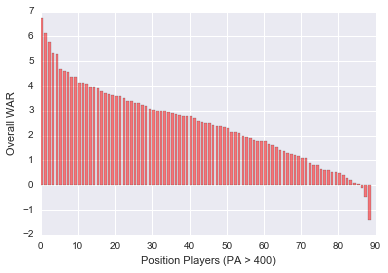

In [319]:
objects = mlb_war_2016_hitters['name_common']
y_pos = np.arange(len(objects))
x = mlb_war_2016_hitters['WAR']
plt.bar(y_pos, x, alpha=0.5, color='RED', width = .7);
plt.xlabel('Position Players (PA > 400)')
plt.ylabel('Overall WAR')
plt.xticks()
plt.show()

#### Could replace the two matplotlib graphs with a tableau interactive graph...
Let's try that out before we move on, save the csv and switch to Tableau for a moment

In [320]:
mlb_war_2016_hitters.to_csv('2016_400PA_hitter_war')

### 3. How Does This Season Compare to Harper's Career? 
- Line graphs showing various statistics of choosing: harper_stats
- Analyze what has changed

Clearly Harper hasn't lived up to anyones standards this year. This is in large part due to the huge success he had last season as he rolled through National league pitching to the tune of a .460/.649/1.109 split. Before last season as well, Harper has seemingly had consistent success when healthy since he came up at the age of 19 years old. So it leaves us with the question... What has gone so terribly wrong?

In [321]:
harper_stats.info() #Let's focus on rates since counts are going to vary based on games played...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 29 columns):
Year    5 non-null int64
Age     5 non-null int64
Tm      5 non-null object
Lg      5 non-null object
G       5 non-null int64
PA      5 non-null int64
AB      5 non-null int64
R       5 non-null int64
H       5 non-null int64
2B      5 non-null int64
3B      5 non-null int64
HR      5 non-null int64
RBI     5 non-null int64
SB      5 non-null int64
CS      5 non-null int64
BB      5 non-null int64
SO      5 non-null int64
BA      5 non-null float64
OBP     5 non-null float64
SLG     5 non-null float64
OPS     5 non-null float64
OPS+    5 non-null int64
TB      5 non-null int64
GDP     5 non-null int64
HBP     5 non-null int64
SH      5 non-null int64
SF      5 non-null int64
IBB     5 non-null int64
WAR     5 non-null float64
dtypes: float64(5), int64(22), object(2)
memory usage: 1.2+ KB


In [322]:
harper_rate_stats = harper_stats[['Year', 'Age', 'G', 'AB', 'BA', 'OBP', 'SLG', 'OPS', 'WAR']]
harper_rate_stats

Year  Age    G   AB     BA    OBP    SLG    OPS   WAR
0  2012   19  139  533  0.270  0.340  0.477  0.817  5.14
1  2013   20  118  424  0.274  0.368  0.486  0.854  3.72
2  2014   21  100  352  0.273  0.344  0.423  0.768  1.04
3  2015   22  153  521  0.330  0.460  0.649  1.109  9.93
4  2016   23  101  341  0.235  0.378  0.446  0.824  1.55

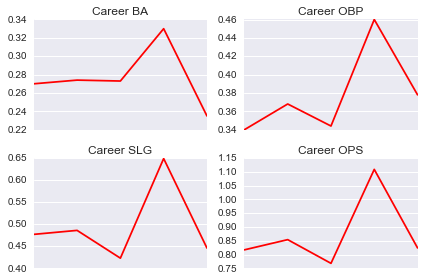

In [323]:
objects = harper_rate_stats['Year']
x = np.arange(len(objects))
y1 = harper_rate_stats['BA']
y2 = harper_rate_stats['OBP']
y3 = harper_rate_stats['SLG']
y4 = harper_rate_stats['OPS']
fig = plt.figure(figsize=(6, 4))
sub1 = plt.subplot(2, 2, 1)
sub1.plot(x, y1, color='RED')
sub1.set_title('Career BA')
sub1.set_xticks([])
sub2 = plt.subplot(2, 2, 2)
sub2.plot(x, y2, color='RED')
sub2.set_title('Career OBP')
sub2.set_xticks([])
sub3 = plt.subplot(2, 2, 3)
sub3.plot(x, y3, color='RED')
sub3.set_title('Career SLG')
sub3.set_xticks([])
sub4 = plt.subplot(2, 2, 4)
sub4.plot(x, y4, color='RED')
sub4.set_title('Career OPS')
sub4.set_xticks([])
fig.tight_layout()
plt.show()

So Harper has seen a significant decrease in all of the major rate statistics since last year, but we knew that. What is alarming is how much 2015 is starting to look like an outlier. Nobody has brought this up because of Harper's elite standing. Everyone expects him to be great so when he broke out and won the MVP last year, nobody was surprised. However, after this year, despite his great talent we may have to start wondering if 2015 was not the standard for Harper, but rather the extreme. Only time will tell...

### 4. What is The Meaning of the Most Valuable Player Award?
- Introduce the change of scope
- Show Wins Above Replacement stats for past MVPs graphically: 

When we hear the term "Most Valuable Player", we think of excellence. The best of the best. That's what Harper did last year when we posted a WAR of almost 10. Let's look at past MVPs and see how Harpers best season compared to other greats in seasons where they won an NL or AL MVP award

In [324]:
player_awards = pd.read_csv('/Users/Conor/Documents/Data Science/Datasets/MLB History/player_award.csv')
mlb_war = mlb_war.rename(columns = {'player_ID':'player_id', 'year_ID':'year'})

#### Now we need to add in the respective names and WARs from the mlb_war data...

In [325]:
mlb_war_mvp = mlb_war.merge(player_awards, how='inner', on=['player_id','year'])
mlb_war_mvp = mlb_war_mvp[mlb_war_mvp['award_id'] == 'Most Valuable Player'][mlb_war_mvp['PA'] > 300]
mlb_war_mvp = mlb_war_mvp[[ 'lg_ID', 'award_id', 'name_common','year', 'WAR']]
mlb_war_mvp = mlb_war_mvp.sort(columns='WAR', ascending=False).reset_index()
mlb_war_mvp.head(50)

index lg_ID              award_id       name_common  year    WAR
0    4766    AL  Most Valuable Player         Babe Ruth  1923  14.07
1    6016    AL  Most Valuable Player  Carl Yastrzemski  1967  12.43
2     510    NL  Most Valuable Player       Barry Bonds  2001  11.85
3    1883    AL  Most Valuable Player        Lou Gehrig  1927  11.81
4     515    NL  Most Valuable Player       Barry Bonds  2002  11.78
5    4448    AL  Most Valuable Player        Cal Ripken  1991  11.49
6    3301    AL  Most Valuable Player     Mickey Mantle  1957  11.30
7    3296    AL  Most Valuable Player     Mickey Mantle  1956  11.24
8    3487    NL  Most Valuable Player       Willie Mays  1965  11.22
9    3826    NL  Most Valuable Player       Stan Musial  1948  11.11
10   3722    NL  Most Valuable Player        Joe Morgan  1975  10.95
11   5902    AL  Most Valuable Player      Ted Williams  1946  10.87
12   1022    AL  Most Valuable Player           Ty Cobb  1911  10.69
13    522    NL  Most Valuable Player       Barry Bonds  2004  10.62
14   3465    NL  Most Valuable Player       Willie Mays  1954  10.61
15   6055    AL  Most Valuable Player       Robin Yount  1982  10.51
16   1731    AL  Most Valuable Player       Jimmie Foxx  1932  10.47
17    581    AL  Most Valuable Player      Lou Boudreau  1948  10.38
18   2520    NL  Most Valuable Player    Rogers Hornsby  1929  10.37
19    236    NL  Most Valuable Player       Ernie Banks  1959  10.23
20   2508    NL  Most Valuable Player    Rogers Hornsby  1925  10.21
21   4682    AL  Most Valuable Player          Al Rosen  1953  10.09
22   5196    AL  Most Valuable Player      Tris Speaker  1912  10.08
23   2305    NL  Most Valuable Player      Bryce Harper  2015   9.93
24   2370    AL  Most Valuable Player  Rickey Henderson  1990   9.91
25    494    NL  Most Valuable Player       Barry Bonds  1993   9.90
26   5700    NL  Most Valuable Player      Larry Walker  1997   9.81
27    480    NL  Most Valuable Player       Barry Bonds  1990   9.73
28   4277    NL  Most Valuable Player     Albert Pujols  2009   9.70
29    810    AL  Most Valuable Player         Rod Carew  1977   9.69
30   4562    NL  Most Valuable Player   Jackie Robinson  1949   9.61
31   3727    NL  Most Valuable Player        Joe Morgan  1976   9.61
32    634    AL  Most Valuable Player      George Brett  1980   9.43
33   4594    AL  Most Valuable Player    Alex Rodriguez  2007   9.42
34    233    NL  Most Valuable Player       Ernie Banks  1958   9.41
35   3813    NL  Most Valuable Player       Stan Musial  1943   9.39
36   4590    AL  Most Valuable Player    Alex Rodriguez  2005   9.35
37   1736    AL  Most Valuable Player       Jimmie Foxx  1933   9.24
38   4271    NL  Most Valuable Player     Albert Pujols  2008   9.23
39    518    NL  Most Valuable Player       Barry Bonds  2003   9.16
40   5914    AL  Most Valuable Player      Ted Williams  1949   9.15
41   1900    AL  Most Valuable Player        Lou Gehrig  1936   9.10
42   2120    AL  Most Valuable Player       Ken Griffey  1997   9.10
43   1418    AL  Most Valuable Player      Joe DiMaggio  1941   9.05
44   1086    AL  Most Valuable Player     Eddie Collins  1914   9.05
45    490    NL  Most Valuable Player       Barry Bonds  1992   9.01
46   4909    NL  Most Valuable Player      Mike Schmidt  1980   8.84
47   1446    AL  Most Valuable Player    Josh Donaldson  2015   8.81
48   2281    AL  Most Valuable Player     Josh Hamilton  2010   8.71
49   5069    AL  Most Valuable Player     George Sisler  1922   8.69

According to WAR, Bryce Harper's 2015 MVP campaign ranks 24th among 165 past AL and NL MVPs in the history of the game. This put him in the 85th percentile, pretty impressive considering he is surrounded by an abundence of hall of famers on the above list.

#### Let's look at descriptive statistics to use...
- 24th out of 165
- 85th percentile
- Mean: 7.5
- STD: 2.1
- Acknowledge Top: Babe Ruth 1923 AL - 14.07 wins
- Acknowledge Bottom: Willie Stargell 1979 NL - 2.53 wins

In [326]:
mlb_war_mvp.describe()

index         year         WAR
count   166.000000   166.000000  166.000000
mean   2837.018072  1969.234940    7.526205
std    1767.642225    28.252309    2.180506
min       2.000000  1911.000000    2.530000
25%    1130.000000  1947.250000    5.995000
50%    2832.000000  1971.500000    7.505000
75%    4425.000000  1993.750000    9.100000
max    6060.000000  2015.000000   14.070000

### 5. How Do Most Valuable Players Usually Perform the Following Year?

- Intro about how performance can be hard to maintain
- Graph showing following seasons of MVPs, identify average

As the descriptive statistics show, MVPs have given great value to their team. However, this excellence can prove hard to repeat the following year. Only the greats can put up MVP numbers year in year out, so we can expect a reasonable decline in performance.

In [327]:
mlb_war_mvp['next_year'] = mlb_war_mvp['year'] + 1
mlb_war_mvp['next_WAR'] = np.zeros(len(mlb_war_mvp))
mlb_war_mvp['next_PA'] = np.zeros(len(mlb_war_mvp))
mlb_war_mvp.head(5)

for i in range(len(mlb_war_mvp)):
    player = mlb_war_mvp['name_common'][i]
    year = mlb_war_mvp['next_year'][i]
    row = mlb_war[mlb_war['name_common'] == player][mlb_war['year'] == year].index
    next_war = mlb_war['WAR'].iloc[row]
    next_PA = mlb_war['PA'].iloc[row]
    next_war_list = next_war.tolist()
    next_PA_list = next_PA.tolist()
    if len(next_war_list) > 0:
        mlb_war_mvp['next_WAR'][i] = next_war_list.pop()
    else:
        mlb_war_mvp['next_WAR'][i] = 0 
    if len(next_PA_list) > 0:
        mlb_war_mvp['next_PA'][i] = next_PA_list.pop()
    else:
        mlb_war_mvp['next_PA'][i] = 0 
mlb_war_mvp = mlb_war_mvp.drop('award_id', axis=1)
mlb_war_mvp = mlb_war_mvp.sort('next_WAR', ascending = False)
mlb_war_mvp.head() #It works... Thank God

index lg_ID       name_common  year    WAR  next_year  next_WAR  next_PA
2     510    NL       Barry Bonds  2001  11.85       2002     11.78    612.0
0    4766    AL         Babe Ruth  1923  14.07       1924     11.73    681.0
7    3296    AL     Mickey Mantle  1956  11.24       1957     11.30    623.0
39    518    NL       Barry Bonds  2003   9.16       2004     10.62    617.0
1    6016    AL  Carl Yastrzemski  1967  12.43       1968     10.47    664.0

#### Deal with 2015 MVPs projected stats rather than current to be fair

In [328]:
mlb_war_mvp['next_WAR'][mlb_war_mvp['name_common'] == 'Josh Donaldson'] = 7.8912
mlb_war_mvp['next_WAR'][mlb_war_mvp['name_common'] == 'Bryce Harper'] = 2.1236
print(mlb_war_mvp[['next_WAR','name_common']][mlb_war_mvp['next_year'] == 2016])

    next_WAR     name_common
47    7.8912  Josh Donaldson
23    2.1236    Bryce Harper


#### Deal with players not meeting 400 PA requirement the following year

In [329]:
mlb_war_mvp = mlb_war_mvp[mlb_war_mvp['next_PA'] > 400]

In [330]:
mlb_war_mvp.info()
mlb_war_mvp = mlb_war_mvp.reset_index()
mlb_war_mvp = mlb_war_mvp.drop('index', axis=1)
mlb_war_mvp = mlb_war_mvp.drop('level_0', axis=1)
mlb_war_mvp.tail(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 2 to 95
Data columns (total 8 columns):
index          151 non-null int64
lg_ID          151 non-null object
name_common    151 non-null object
year           151 non-null int64
WAR            151 non-null float64
next_year      151 non-null int64
next_WAR       151 non-null float64
next_PA        151 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 10.6+ KB


lg_ID      name_common  year    WAR  next_year  next_WAR  next_PA
121    AL     Phil Rizzuto  1950   6.73       1951    3.6200    630.0
122    AL      Boog Powell  1970   5.07       1971    3.5700    509.0
123    AL    Ichiro Suzuki  2001   7.70       2002    3.4800    728.0
124    NL      Larry Doyle  1912   4.96       1913    3.3400    558.0
125    NL    Jim Bottomley  1928   5.26       1929    3.1700    645.0
126    AL     Lou Boudreau  1948  10.38       1949    3.1200    561.0
127    NL   Ernie Lombardi  1938   5.65       1939    3.0600    494.0
128    NL   Gabby Hartnett  1935   4.98       1936    3.0300    468.0
129    NL     Marty Marion  1944   4.71       1945    2.9400    477.0
130    NL     Willie McGee  1985   8.14       1986    2.9100    539.0
131    NL      Ryan Howard  2006   5.19       2007    2.9100    648.0
132    AL   Justin Morneau  2006   4.33       2007    2.8800    668.0
133    NL     Jake Daubert  1913   3.96       1914    2.7500    544.0
134    AL    Juan Gonzalez  1996   3.78       1997    2.7000    579.0
135    NL        Joe Torre  1971   5.91       1972    2.7000    613.0
136    NL  Frank McCormick  1940   5.73       1941    2.5300    653.0
137    AL      Robin Yount  1989   5.77       1990    2.4700    683.0
138    AL     George Burns  1926   4.95       1927    2.2900    607.0
139    NL       Dick Groat  1960   6.19       1961    1.9700    648.0
140    NL        Ken Boyer  1964   6.06       1965    1.8300    605.0
141    NL   Orlando Cepeda  1967   6.80       1968    1.7900    656.0
142    NL     Bryce Harper  2015   9.93       2016    2.1236    431.0
143    NL    Frank Schulte  1911   5.27       1912    1.4200    632.0
144    AL  Zoilo Versalles  1965   7.17       1966    1.3200    596.0
145    NL       Hank Sauer  1952   5.68       1953    1.3000    449.0
146    NL   Frankie Frisch  1931   3.71       1932    1.0400    513.0
147    AL      George Bell  1987   4.96       1988    0.7600    658.0
148    NL   Roy Campanella  1955   5.25       1956    0.5800    461.0
149    AL   Jeff Burroughs  1974   3.57       1975    0.4400    672.0
150    NL   Roy Campanella  1953   7.07       1954    0.1200    446.0

If Bryce Harper keeps his current pace, he is projected to rack up .57 more wins above replacement this season. That would put him at 2.12 WAR for this MVP follow up season. Lets see where this would ranks compared to past MVPs. Looks like that puts him 143rd out of 150 MVP follow up seasons. That is equivelent to roughly the 5th percentile. So thats pretty damn bad.

### 6. Where Does Harper Rank as Far as "Drop-off" Goes?
- Introduce concept of "drop-off"
- Interactive Tableau graph with horizontal bar chart and mean stacked bar chart

So Harper has been pretty bad in historical context, but seeing as he was so good last year, I would assume our discovery is even more shocking when we look at the biggest drop off in performance from MVP to follow up season. Lets check it out.

In [331]:
mlb_war_mvp['drop_off'] = -1 * (mlb_war_mvp['WAR'] - mlb_war_mvp['next_WAR'])
mlb_war_mvp = mlb_war_mvp.sort('drop_off', ascending = False)
mlb_war_mvp = mlb_war_mvp.reset_index()
mlb_war_mvp = mlb_war_mvp.drop('index', axis=1)
mlb_war_mvp = mlb_war_mvp.drop('next_PA', axis=1)
mlb_war_mvp.head()

lg_ID   name_common  year   WAR  next_year  next_WAR  drop_off
0    AL  Joe DiMaggio  1947  4.83       1948      6.88      2.05
1    AL    Cal Ripken  1983  8.16       1984     10.00      1.84
2    AL    Yogi Berra  1955  4.49       1956      6.31      1.82
3    AL    Mike Trout  2014  7.86       2015      9.39      1.53
4    NL   Barry Bonds  2003  9.16       2004     10.62      1.46

In [332]:
mlb_war_mvp.describe()

year         WAR    next_year    next_WAR    drop_off
count   151.000000  151.000000   151.000000  151.000000  151.000000
mean   1970.046358    7.596755  1971.046358    5.731687   -1.865068
std      27.994366    2.135655    27.994366    2.526018    2.012190
min    1911.000000    3.570000  1912.000000    0.120000   -7.806400
25%    1948.500000    6.010000  1949.500000    4.030000   -3.120000
50%    1971.000000    7.550000  1972.000000    5.560000   -1.770000
75%    1994.500000    9.125000  1995.500000    7.355000   -0.605000
max    2015.000000   14.070000  2016.000000   11.780000    2.050000

After removing players that didn't come to bat atleast 400 times in their follow up season. The mean drop off in WAR for MVPs the following season is roughly 1.87 wins above replacement less than their award winning performance. This is to be expected. However, right now Harper is projected to finish with the most disapointing season of all time from a healthy, returning MVP. Posting an astounding drop off of 7.8 wins. Wow.

#### Save and get to making a Tableau dashboard that shows this effectively...

In [334]:
mlb_war_mvp.to_csv('mlb_war_mvp')
avg_vals = pd.DataFrame(columns = [['Observed','WAR in MVP Season', 'WAR in Follow-up Season', 'Drop-off']])
avg_vals['Observed'] = ['Past MVP', 'Bryce Harper']
avg_vals['WAR in MVP Season'] = ['7.60', '9.93']
avg_vals['WAR in Follow-up Season'] = ['5.73', '2.12']
avg_vals['Drop-off'] = ['1.87', '7.80']
avg_vals.to_csv('Bryce_mvp_comparison')